In [72]:
import numpy as np
import pandas as pd
# 從 keras.utils 匯入 to_categroical，因為後續要將 label 標籤 轉換成 one-hot encoding。
from tensorflow.keras.utils import to_categorical
# 設定 seed 可以讓每次產生隨機值時，都會有相同的輸出。(若使用GPU，則無法每次皆相同)
seed = 1234
np.random.seed(seed)

from tensorflow.keras import layers, metrics
from tensorflow.keras.layers import Dense,InputLayer,Flatten
from tensorflow.keras import models
import tensorflow as tf
tf.random.set_seed(seed)


from tensorflow.keras.datasets import mnist,cifar10
(X_train_image, y_train_label),\
    (X_test_image, y_test_label) = cifar10.load_data()

import matplotlib.pyplot as plt
def plot_image(image):
    # 設定圖形顯示大小
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    # 使用 plt.imshow() 顯示圖像，傳入參數是 28 X 28 的圖形，
    # cmap 參數設定為 binary 以黑白灰階顯示
    plt.imshow(image, cmap = 'binary')
    # 開始繪圖
    plt.show()

def plot_images_labels_prediction(images, labels, prediction,idx, num = 10):

    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    # 如果顯示筆數大於25 則將他設定為25 以避免錯誤
    if num > 25: num = 25
    # 使用 for 迴圈依序畫出 num 個數字圖形
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i) # 建立 5 X 5 的 subgraph 子圖形
        ax.imshow(images[idx], cmap = 'binary') # 畫出 subgraph 子圖形
        title = "label=" + str(labels[idx]) # 設定子圖形 title 顯示標籤欄位
        if len(prediction) > 0: # 如果 prediction 有傳入值
            title += ",predict=" + str(prediction[idx]) # 將 prediction 加入 title
        ax.set_title(title, fontsize = 12) # 設定標題大小
        ax.set_xticks([]); ax.set_yticks([]) # 設定不顯示刻度
        idx += 1 # 讀取下一筆
    plt.show() # 開始畫圖

X_Train = X_train_image.astype('float32')
X_Test = X_test_image.astype('float32')
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255

y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization
model = models.Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [73]:

print('x_train : ', X_Train.shape)
print(model.summary())
y_train_label[:5]

x_train :  (50000, 32, 32, 3)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_74 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                       

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

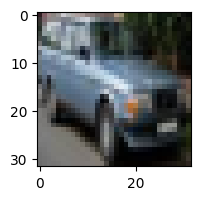

In [ ]:
plot_image(X_train_image[201])

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

loss_function = 'CategoricalCrossentropy'#CategoricalCrossentropy
optimize_function = 'Adam'


early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.compile(loss = loss_function, optimizer = optimize_function,metrics = ['accuracy'])

train_history = model.fit(x = X_Train_normalize, y = y_TrainOneHot,
                            validation_split = 0.2, epochs = 50, batch_size = 64,
                            verbose = 1)


Epoch 1/50
625/625 [==============================] - 20s 13ms/step - loss: 1.9581 - accuracy: 0.2809 - val_loss: 1.7637 - val_accuracy: 0.3783
Epoch 2/50
625/625 [==============================] - 8s 13ms/step - loss: 1.5467 - accuracy: 0.4264 - val_loss: 1.2746 - val_accuracy: 0.5149
Epoch 3/50
625/625 [==============================] - 8s 12ms/step - loss: 1.3405 - accuracy: 0.5201 - val_loss: 1.4385 - val_accuracy: 0.4805
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 1.2011 - accuracy: 0.5750 - val_loss: 1.1372 - val_accuracy: 0.5990
Epoch 5/50
625/625 [==============================] - 8s 13ms/step - loss: 1.0960 - accuracy: 0.6163 - val_loss: 0.8664 - val_accuracy: 0.7002
Epoch 6/50
625/625 [==============================] - 7s 12ms/step - loss: 1.0146 - accuracy: 0.6506 - val_loss: 0.8571 - val_accuracy: 0.7028
Epoch 7/50
625/625 [==============================] - 8s 13ms/step - loss: 0.9673 - accuracy: 0.6651 - val_loss: 0.8310 - val_accuracy: 0.707

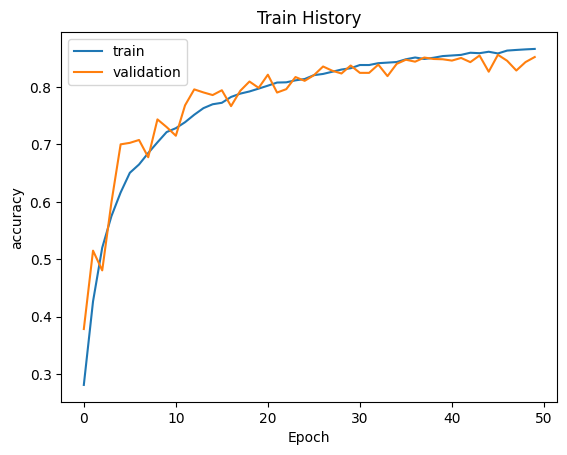

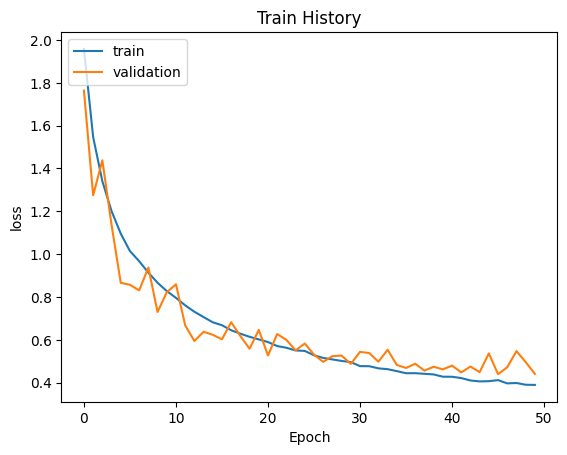

In [75]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [76]:
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print('accuracy = ', scores[1])
prediction = np.argmax(model.predict(X_Test), axis = -1)


313/313 [==============================] - 2s 5ms/step - loss: 0.4617 - accuracy: 0.8516

accuracy =  0.8515999913215637
313/313 [==============================] - 1s 3ms/step


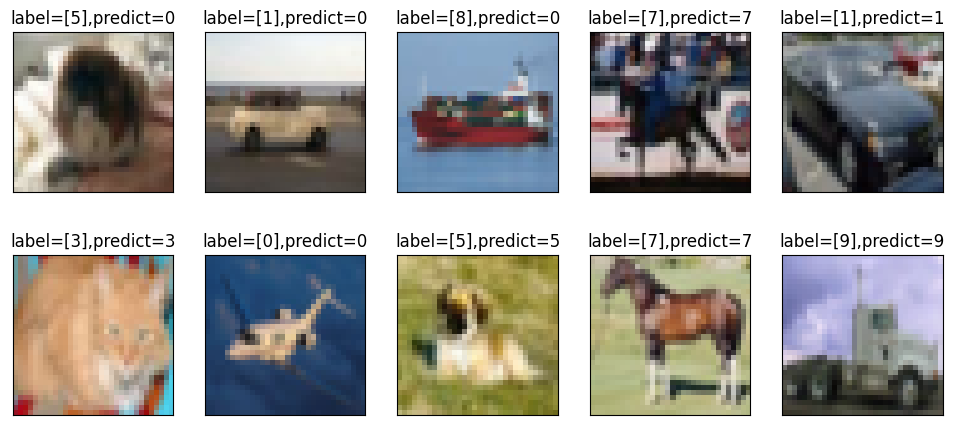

In [77]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx = 200)